In [1]:
import math
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
N = 50                        #number of points in each direction
x_start, x_end = -2.0, 2.0    #x-direction boundary
y_start, y_end = -1.0, 1.0    #y-direction boundary
x = np.linspace(x_start, x_end)
y= np.linspace(y_start, y_end)
X, Y = np.meshgrid(x, y)

In [3]:
# consider the doublet with strength kappa
# which is located at the origin

kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0

In [4]:
#now we define a function that creates the velocity
#field of the doublet

def get_velo_doublet(strength, xd, yd, X, Y):
    u = (-strength / (2*math.pi) *
        ((X - xd)**2 - (Y - yd)**2) /
        ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2*math.pi) *
        2 * (X - xd) * (Y - yd) /
        ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

# now we define a function that creates the streamlines
# of the doublet

def get_streamfunc_doublet(strength, xd, yd, X, Y):
    
    psi = (-strength / (2*math.pi) * 
           (Y - yd) / ((X - xd)**2 +
                       (Y - yd)**2))
    return psi

In [5]:
#now, compute velocity field
u_doublet, v_doublet = get_velo_doublet(kappa, x_doublet, y_doublet, X, Y)

#compute stream function
psi_doublet = get_streamfunc_doublet(kappa, x_doublet, y_doublet, X, Y)

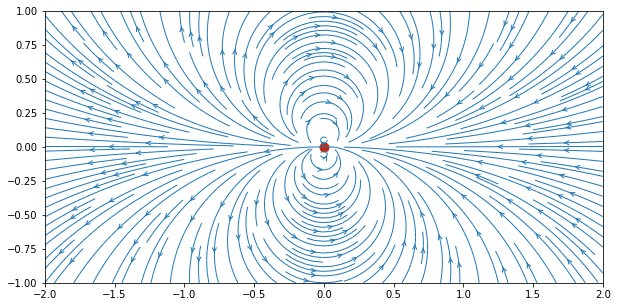

In [6]:
#now we can visualize

width = 10
height = (y_end - y_start) / (x_end - x_start) *  width
py.figure(figsize=(width, height))
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u_doublet, v_doublet,
             density=2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

Now, we will place this doublet in a freestream field, so that we can compare the results and see the affect.

In [7]:
u_inf = 1.0 #freestream speed

In [8]:
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'lidewidth', 'linestlye'
  s)


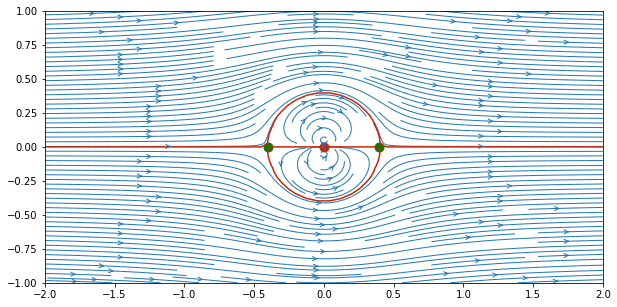

In [10]:
#we can use superposition to visualize the flow
#field
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

#plot streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)

py.streamplot(X, Y, u, v, 
             density=2, linewidth=1, arrowsize=1, arrowstyle='->')
py.contour(X, Y, psi, levels=[0.], colors='#CD2305', lidewidth=2, linestlye='->')

py.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

#find the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

#display the stagnation points
py.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
          color='g', s=80, marker='o');
